<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/R_ACLED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

The goal is to identify all of the possible colations in the fighting in South Sudan. Sometimes A & B fight against C&D and sometimes A & D firght against B & C. Why?

*"And for every pair of unique groups, I want to count how many times they fought together (allies) and how many times they faced each other (enemies) "*

# ACLED Info

https://acleddata.com/2019/03/14/acled-introduces-new-event-types-and-sub-event-types/

## ACLED COdebook
      https://www.acleddata.com/wp-content/uploads/2015/01/ACLED_Codebook_2015.pdf

## ACLED Rsource Library
    https://acleddata.com/resources/general-guides/

# The Variables



# The columns.

 ## First 4 columns re Event Idenitfication.

    Data Id is an index of battles.  Not Permanent.  Subject to bien incorporated into another or number just revised


    ISO. Is a std country code usefull to merge with other data sets.

    EVENT ID Country column similar to data id .  Index  ,reference.  Blends Country and event into one.  Text Column.

    Event Id not country.  Similar but numeric.


    ## Next 3 columns re When the event took place

    Event date.

    TIME PRECISON.  If an event last 5 days each day would get its own row. Not recorded as s ingle act of violence.

    Year

    Time Precison: IKf the precise day of a event is known that is category1 ;  If the event is reported to have happened during some week that is category 2;within a month, the mid point of the month is used and this is categorized as group 3.  

## Cols H & I  Event Type adn Sub event

  Event typ : 6 possibilities. See the codebook
  More detail on event type.

##  Cols J to P Describe teh actors

  Actor1  and Actor 2 are teh primary combatants.  TORDER IMPLIES NOTHING.

  Associated Actors 1 & 2. can either be additional people fighting ont hat side, or a more specific naming of the group

Inter 1 and Inter 2 describe the Actors 1 & 2. Assigns all combatants to one of 8 categories. 
    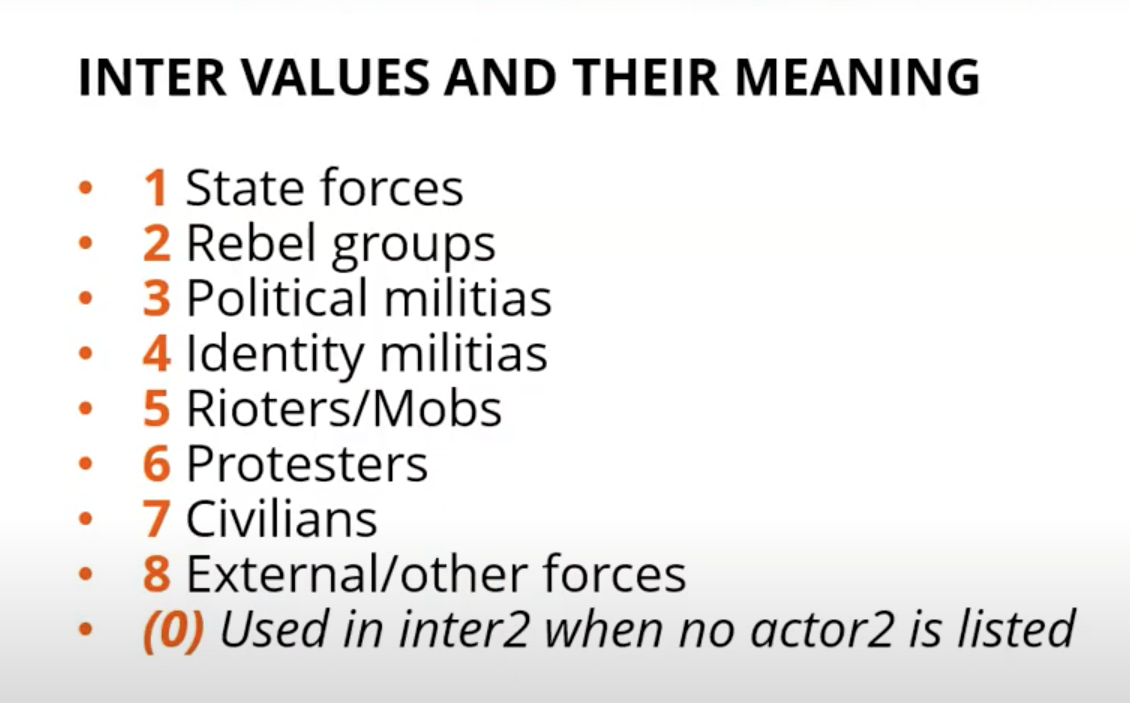

    



Variables Explained Continued

**https://acleddata.com/resources/general-guides/**

Column P Interaction
 Concatenate Inter Actor 1 + Inter Actor 2 to form Interaction "37" i.e., Political malitias bttleing with Civilians.  NOTE THE SMALLEST DIGIT GOES FIRST REGARDLESS.  "37" NOT "73".  EXCEPTION. S single actor is "60" NOT "06".

 USEFUL. State repression is "17" : State forces ("1") battling cvilians ("7").

 ## Next 9 columns designate region
  Region: sucha s Cnetral America 
  Country:
  admin1 first local jurisdiction,c.f. State
  admin2 could be  or county
  Admin 3 : sub div of admnin 2
  :ocation Town , city , village, or neighborhood

Long and Lat.  Each location will use a single x.y coord.  I think all locations in Mexico city will go a single coor pair.

GEO PRECISION.
    1 the exact town is know
    2 only a small regionis known. 
    3 only a large region is known.

SOURCE Col Z
  Where did info come from?

Soource Scale . Is the  infor froma. local radio station or a national newspaper?

Cols AB "Qualitative info on the report" ???

Col AC FATALITIES
  If the area is a war zone but the precise # is unknows it is recorded as "10". . Otherwise it is. recorded as "3".

Col AD 
  API Time stamp.  the number of seconds since 1970. as recorded by the API each time an event is uploaded.

ISO 3 column.  Country code








# Options

In [1]:
options(scipen = 999)

options(repr.plot.width=14, repr.plot.height=10)

Dyadic : Actor_1 v Actor_2. Looks at battles

Monadic: looks at only 1 actor but brings up everywhere they have fought regardless of againts who they fought. e.g. A compendium of Boku Haram's fights

For Mondadic data , from the Download page, click ACTOR BASED

ACLED has 2 versions of the data. the DI version has on each line the two combatants. The Mono version has only a single combatatnt on each line. Teh second one woould be twice as long and together they would probably be over 1 milllion rows

# Packages

In [31]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages('DT')
library(DT)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’




# Data

Data as of May 25, 2021 :
    https://drive.google.com/file/d/1GhBTYyAqqKyq6iJ6ynPOOqGoEZpQKgwV/view?usp=sharing

In [3]:
data<- read.csv('/content/ACLED_May_25_2021.csv',stringsAsFactors = FALSE)
head( data,3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,⋯,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,7995904,400,JOR930,930,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Jordan),⋯,Irbid,32.5556,35.8500,2,Al Ghad (Jordan),National,"On 21 May 2021, protesters demonstrated in the Irbid district (Qasabat Irbid) in support of Palestinians. [size=no report]",0,1621902031,JOR
2,8001536,410,KOR17241,17241,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (South Korea),⋯,Naeseong,36.8868,128.7403,1,YNA,National,"On 21 May 2021, members of environmental groups, including the KFEM Andong branch, held a press conference with a banner in front of the Bonghwa-gun Office (Naeseong-ri). They urged the local government to disapprove Yeongpung Seokpo Smelter's request for permission to occupy and use the Nakdong river for the construction of additional facilities. [size=no report]",0,1621956946,KOR
3,7996161,792,TUR16587,16587,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Turkey),⋯,Guroymak,38.5758,42.0156,1,Haberler,National,"On 21 May 2021, a Muslims gathered outside a mosque following the Friday prayer, in Guroymak town of Bitlis and staged a protest to express solidarity with Palestine and condemn Israel. [size=no report]",0,1621902032,TUR


In [ ]:
head( data,3)

In [4]:
dim(data)

[1] 693128     31

In [5]:
str(data)

'data.frame':	693128 obs. of  31 variables:
 $ data_id         : int  7995904 8001536 7996161 7995137 8001282 7994882 7991045 8001542 7992070 8001543 ...
 $ iso             : int  400 410 792 368 158 368 152 410 76 410 ...
 $ event_id_cnty   : chr  "JOR930" "KOR17241" "TUR16587" "IRQ31215" ...
 $ event_id_no_cnty: int  930 17241 16587 31215 2474 31309 7201 17307 41651 17309 ...
 $ event_date      : chr  "21 May 2021" "21 May 2021" "21 May 2021" "21 May 2021" ...
 $ year            : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ time_precision  : int  1 1 1 1 1 1 2 1 1 1 ...
 $ event_type      : chr  "Protests" "Protests" "Protests" "Battles" ...
 $ sub_event_type  : chr  "Peaceful protest" "Peaceful protest" "Peaceful protest" "Armed clash" ...
 $ actor1          : chr  "Protesters (Jordan)" "Protesters (South Korea)" "Protesters (Turkey)" "PKK: Kurdistan Workers Party" ...
 $ assoc_actor_1   : chr  "" "KFEM: Korea Federation for Environmental Movement" "Muslim Group (T

# Pre Process the data

In [7]:
# To make it easier to look athte data in head
#Let us only keep the fist 30 characters of the "notes".
#
#df$filname <- substr(df$filname, 0, 3)

data$notes <- substr(data$notes, 0 , 30)

In [8]:
head(data,3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,⋯,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,7995904,400,JOR930,930,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Jordan),⋯,Irbid,32.5556,35.8500,2,Al Ghad (Jordan),National,"On 21 May 2021, protesters dem",0,1621902031,JOR
2,8001536,410,KOR17241,17241,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (South Korea),⋯,Naeseong,36.8868,128.7403,1,YNA,National,"On 21 May 2021, members of env",0,1621956946,KOR
3,7996161,792,TUR16587,16587,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Turkey),⋯,Guroymak,38.5758,42.0156,1,Haberler,National,"On 21 May 2021, a Muslims gath",0,1621902032,TUR


In [ ]:
tail(data,3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,⋯,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
693126,7369214,76,BRA30923,30923,21 May 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),⋯,Sao Sebastiao da Amoreira,-23.4647,-50.7605,2,G1,National,"On 21 May 2018, around Sao Seb",0,1607555018,BRA
693127,7357183,76,BRA24464,24464,21 May 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),⋯,Encruzilhada do Sul,-30.5441,-52.5212,1,Correio do Povo,Subnational,"On 21 May 2018, in Encruzilhad",0,1607554925,BRA
693128,7822847,156,CHN7668,7668,21 May 2018,2018,2,Protests,Peaceful protest,Protesters (China),⋯,Beijing,39.9062,116.3913,3,CLB (China),Other,Around 21 May 2018 (as reporte,0,1618442058,CHN


## Convert the "timestamp" to ordinary data time. Time stamp is the time the event was uploaded to ACLEA

TIMESTAMP

This is a column automatically generated by the API which records each time an event is uploaded to the API. It's format is that of a Unix timestamp, corresponding to the number of seconds passed since January 1, 1970.

In [9]:
#lubridate::as_datetime(1352068320)

data$uploadTime <- lubridate:: as_datetime(data$timestamp)

In [10]:
head(data,3)


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,⋯,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,uploadTime
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dttm>
1,7995904,400,JOR930,930,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Jordan),⋯,32.5556,35.8500,2,Al Ghad (Jordan),National,"On 21 May 2021, protesters dem",0,1621902031,JOR,2021-05-25 00:20:31
2,8001536,410,KOR17241,17241,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (South Korea),⋯,36.8868,128.7403,1,YNA,National,"On 21 May 2021, members of env",0,1621956946,KOR,2021-05-25 15:35:46
3,7996161,792,TUR16587,16587,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Turkey),⋯,38.5758,42.0156,1,Haberler,National,"On 21 May 2021, a Muslims gath",0,1621902032,TUR,2021-05-25 00:20:32


In [11]:
str(data)

'data.frame':	693128 obs. of  32 variables:
 $ data_id         : int  7995904 8001536 7996161 7995137 8001282 7994882 7991045 8001542 7992070 8001543 ...
 $ iso             : int  400 410 792 368 158 368 152 410 76 410 ...
 $ event_id_cnty   : chr  "JOR930" "KOR17241" "TUR16587" "IRQ31215" ...
 $ event_id_no_cnty: int  930 17241 16587 31215 2474 31309 7201 17307 41651 17309 ...
 $ event_date      : chr  "21 May 2021" "21 May 2021" "21 May 2021" "21 May 2021" ...
 $ year            : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ time_precision  : int  1 1 1 1 1 1 2 1 1 1 ...
 $ event_type      : chr  "Protests" "Protests" "Protests" "Battles" ...
 $ sub_event_type  : chr  "Peaceful protest" "Peaceful protest" "Peaceful protest" "Armed clash" ...
 $ actor1          : chr  "Protesters (Jordan)" "Protesters (South Korea)" "Protesters (Turkey)" "PKK: Kurdistan Workers Party" ...
 $ assoc_actor_1   : chr  "" "KFEM: Korea Federation for Environmental Movement" "Muslim Group (T

# South Sudan Data

In [14]:
# Filtering by one criterion
#filter(starwars, species == "Human")

South_Sudan <- filter( data , country == "South Sudan")

In [15]:
dim(South_Sudan)

[1] 2308   32

In [ ]:
head(South_Sudan,5)  # note not all cols show!

In [34]:
# Group by actors

South_Sudan_Actor_Group_1 <- South_Sudan %>%
                           group_by(actor1 , actor2 ) %>%
                          count()

In [ ]:
South_Sudan_Actor_Group_1 

In [36]:
# the DT version of South_Sudan_Actor_Group_1 
# datatable(iris,rownames = FALSE)
datatable(South_Sudan_Actor_Group_1 ,rownames = FALSE ,filter = "top")


HTML widgets cannot be represented in plain text (need html)

In [26]:
# Group by actors

South_Sudan_Actor_Group_2 <- South_Sudan %>%
                           group_by(actor1,  assoc_actor_1  , actor2 ) %>%
                          count()

In [38]:
datatable(South_Sudan_Actor_Group_2 ,rownames = FALSE ,filter = "top")

HTML widgets cannot be represented in plain text (need html)

In [ ]:
South_Sudan_Actor_Group_2 

In [28]:
South_Sudan_Actor_Group_3 <- South_Sudan %>%
                           group_by(actor1,  assoc_actor_1  , actor2, assoc_actor_2 ) %>%
                          count()

In [29]:
South_Sudan_Actor_Group_3

actor1,assoc_actor_1,actor2,assoc_actor_2,n
<chr>,<chr>,<chr>,<chr>,<int>
Ador Clan Militia (South Sudan),Nuer Ethnic Militia (South Sudan),Civilians (South Sudan),Pastoralists (South Sudan),7
Ador Clan Militia (South Sudan),Nuer Ethnic Militia (South Sudan); Pastoralists (South Sudan),Ciec Clan Militia (South Sudan),Dinka Ethnic Militia (South Sudan); Pastoralists (South Sudan),2
Ador Clan Militia (South Sudan),Nuer Ethnic Militia (South Sudan); Pastoralists (South Sudan),Civilians (South Sudan),Ciec Clan Group (South Sudan); Dinka Ethnic Group (South Sudan); Pastoralists (South Sudan),1
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan),,Agar Clan Dinka Ethnic Militia (Ruop Section) (South Sudan),,1
Agar Clan Dinka Ethnic Militia (Pakam Section) (South Sudan),,Civilians (South Sudan),Health Workers (South Sudan),1
Agar Clan Dinka Ethnic Militia (South Sudan),,Agar Clan Dinka Ethnic Militia (South Sudan),,6
Agar Clan Dinka Ethnic Militia (South Sudan),,Civilians (South Sudan),Taxi Drivers (South Sudan),2
Agar Clan Dinka Ethnic Militia (South Sudan),,Police Forces of South Sudan (2011-),,1
Agar Clan Militia (South Sudan),Dinka Ethnic Militia (South Sudan),Civilians (South Sudan),Agar Clan Group (South Sudan),1


In [40]:
A<- datatable(iris,rownames = FALSE,filter = "top")

In [41]:
A

HTML widgets cannot be represented in plain text (need html)